In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
#matplotlib.inlin

### Data Frame of Airbnb

In [2]:
df_air=pd.read_csv('/content/Airbnb NYC 2019.csv')
df_air=pd.DataFrame(df_air)
df_air.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Removing Unwnated Columns

In [3]:
df_air.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [4]:
df_air.drop(['id','last_review', 'reviews_per_month'],axis=1,inplace=True)

In [5]:
df_air.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
#df_air.info()

In [7]:
#df_air.describe()

## Description of Each Columns

#### Name---> Description about rental place
#### host_id--->Id of each host name
#### host_name--->name of host
#### neighbourhood_group--->New York City is composed of five boroughs: The Bronx, Brooklyn, Manhattan, Queens, and Staten Island. Each borough is coextensive with a respective county of New York State.
#### neighbourhood--->This is the place name of each neighbourhood_group
#### latitude&longitude--->Geo locations of neighborhood_group
#### room_type--->Type of rooms
#### price	---->Price of each room
#### minimum_nights	---->Minimumnights to stay
#### number_of_reviews	---->review count
#### calculated_host_listings_count	---->Cout of each Host has visited the airbnb dataset or website. 
#### availability_365--->Days rental place avaialble

### Imputation Techniques 

In [8]:
df_air_clean=df_air.loc[~df_air['host_name'].isnull()]
df_air_clean['name'].replace({np.nan:'Missing'},inplace=True)

In [9]:
df_air_clean.isnull().sum().reset_index().rename(columns={'index':'Column',0:'Count'})

,Column,Count
0,name,0
1,host_id,0
2,host_name,0
3,neighbourhood_group,0
4,neighbourhood,0
5,latitude,0
6,longitude,0
7,room_type,0
8,price,0
9,minimum_nights,0


### 1)Which hosts are the busiest and why?

### Top 10 hosts

In [10]:
host_id11=df_air_clean[['host_id','host_name']].value_counts().reset_index().head(10)
host_id11.rename(columns={'host_id':'Host_id','host_name':'Host_name',0:'Count'},inplace=True)
host_id11['Host_id']=host_id11['Host_id'].astype('string')+"_"

In [11]:
import plotly.express as px
fig = px.bar(host_id11, y='Count', x='Host_id', text='Count',color='Host_name')
fig.show()

In [12]:
sonder_data=df_air_clean.query("host_id==219517861")

In [13]:
sonder_data['neighbourhood'].value_counts().reset_index()

,index,neighbourhood
0,Financial District,218
1,Murray Hill,50
2,Theater District,27
3,Hell's Kitchen,15
4,Chelsea,7
5,Upper East Side,6
6,Midtown,4


In [14]:
sonder_data[['neighbourhood','name']].value_counts().reset_index()

,neighbourhood,name,0
0,Theater District,Sonder | The Biltmore | Stunning 1BR + Sofa Bed,4
1,Theater District,Sonder | The Biltmore | Spacious 1BR + Kitchen,4
2,Hell's Kitchen,Lovely 1BR in Hell's Kitchen by Sonder,2
3,Murray Hill,Sonder | The Nash | Original 1BR + Rooftop,2
4,Financial District,Sonder | 116 John | Relaxed 1BR + Gym,2
...,...,...,...
307,Financial District,Sonder | Stock Exchange | Unique 1BR + Lounge,1
308,Financial District,Sonder | Stock Exchange | Unique 1BR + Sofa Bed,1
309,Financial District,Sonder | Stock Exchange | Upscale 1BR + Sofa Bed,1
310,Financial District,Sonder | Stock Exchange | Upscale 2BR + Kitchen,1


In [15]:
#sonder_data['name'].value_counts().reset_index()[sonder_data['name'].value_counts().reset_index()['name']!=1]

### As we can see from above plot the Sonder(NYC) is busisest host man.Beacause his rental place has been Booked for more number of times.

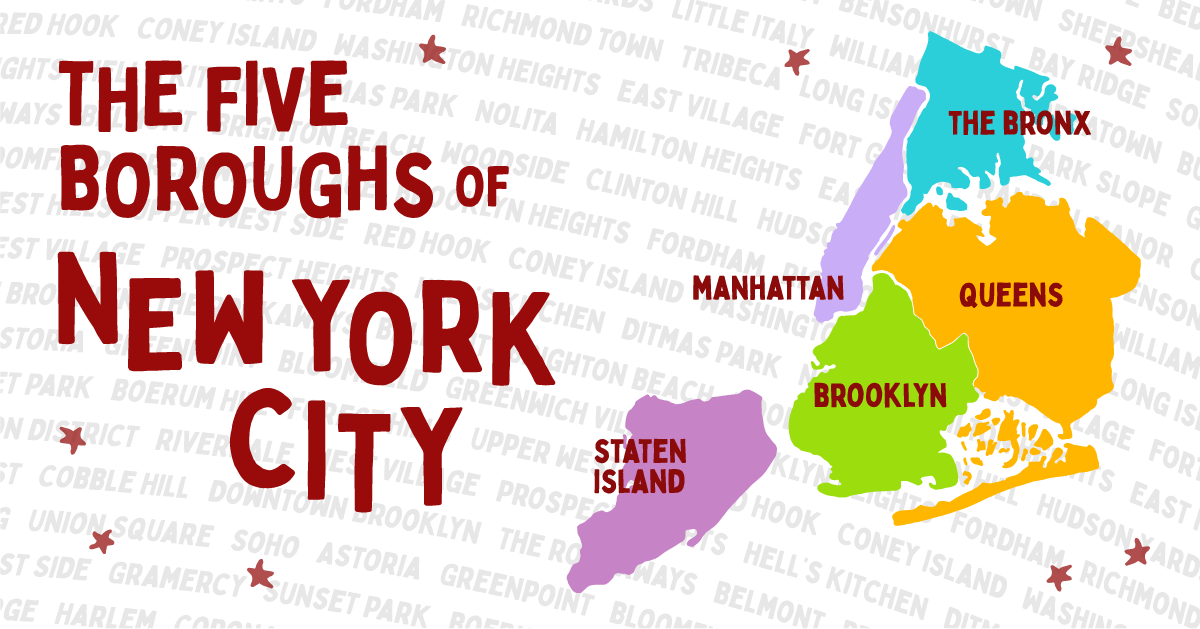

## Hi I'm Vidhyut and  Iam a traveller. I moving to Queens,Brooklyn, Manhattan Neigborhoods Group to explore it.I don't know some information and living cost about those places. As you are a DataScientist explore the given Dataset and answer some specific Question which mentioned below.

### 1)I'm choosen Queens Neigborhood to live there for 20 days.Whether it will be cheaper to stay there compare to other neighborhoods.
### 2)If Queens Neigborhood is cheaper,Then which room type can I prefer and area(neighborhood) best to visit  at Affordable cost. If not what is the alternative option to stay at other neighborhood group with room type and places at best cost. 
### 3)Once I stayed for  20 days.I had a balance amouunt of Rs.15000.Then I decided to stay other 10 days at Staten Island.Is this amount is sufficient only for room expenses?
### 4)If yes, Then which Room type is prefer to live luxury life at Staten Island.I don't know the best place to visit in Staten Island.You guys explore it and tell me the best 7 places to visit.
### 5)I'm really excited and satifsied that room provided in Staten Island which was really clean and awesome.I like to know the host name to thank and give positive feedback.